## Insurance Fraud Claims Detection: EDA and Modelling

### Import all the necessary packages:

In [273]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV   

#All the base algo:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


#model evaluation matrics:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, roc_curve, roc_auc_score

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data read and inspection:

In [131]:
#read and store the data into a dataframe:
data = pd.read_excel(r'C:\Users\91842\Downloads\insurance claims.xlsx')
data.head()

,Name,Surname,Age,Gender,Marital_Status,Date_Of_Birth,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,...,Insured_ID,Kind_Of_Loss,Claim_Amount,Service_Provider,Policy_Holder_Street,Policy_Holder_Province,Policy_Holder_City,Policy_Holder_Area,Policy_Holder_Postal,Fraudulent_Claim
0,Lenna,Britt,48.0,Female,Widowed,1972-04-11T09:52:23,757809.97,2472.35,2007-12-20T01:53:10,2010-12-20T08:59:34,...,Discovery,Water,212213.66,"Johnson, Rose and Chavez",James Mountain,Kenya,Baileyfort,Nevada,16007,T
1,Melia,Travis,50.0,Male,Married,1970-03-18T09:40:01,6750638.09,1614.29,2012-08-17T15:47:57,2014-04-10T08:39:24,...,Discovery,Natural Disaster,2488934.79,"Jones, Gonzalez and Hensley",Ramirez Bypass,Central African Republic,Johnside,Pennsylvania,72834,T
2,Rayford,Weeks,NaN,Female,Separated,NaN,1055481.09,3842.80,1986-12-07T10:50:36,2010-06-24T02:20:07,...,Miway,Theft,9095.35,Black PLC,Danny Terrace,Germany,Stephanieville,Massachusetts,13812,T
3,Particia,Paul,79.0,Female,Married,1941-06-15T08:29:12,6067239.19,4210.64,2019-03-21T14:54:21,NaN,...,First for Woman,Natural Disaster,1998664.60,Morse and Sons,Ronald Glens,Iceland,Port Heatherburgh,Nevada,17076,T
4,Derrick,Valenzuela,75.0,Female,Separated,1945-03-22T01:45:12,8484415.83,3994.97,2004-03-20T06:39:45,1920-06-16T10:32:02,...,Hollard,Natural Disaster,4313932.55,"Krause, Phillips and Mccall",Mary Station,Mozambique,Kevinburgh,Louisiana,99268,T


Dependent feature: Fraudulent_Claim
- T indicates it is a fraud claim     (can be labelled as class 1)
- F indicates it is not a fraud claim (can be labelled as class 0)

In [14]:
#check the shape of the data:
data.shape

(100, 24)

Observation: 
- There are total 100 rows and 24 columns present in the data (including target column)
- This dataset has a high number of features in comparison to the number of data available

In [13]:
#check the data types of the columns:
data.dtypes

Name                               object
Surname                            object
Age                               float64
Gender                             object
Marital_Status                     object
Date_Of_Birth                      object
Sum_Insured                       float64
Policies_Revenue                  float64
Policy_Start                       object
Policy_End                         object
Fraudulent_Claim_Reason            object
Date_Of_Loss                       object
Date_Of_Claim              datetime64[ns]
Broker_ID                          object
Insured_ID                         object
Kind_Of_Loss                       object
Claim_Amount                      float64
Service_Provider                   object
Policy_Holder_Street               object
Policy_Holder_Province             object
Policy_Holder_City                 object
Policy_Holder_Area                 object
Policy_Holder_Postal                int64
Fraudulent_Claim                  

Observation:
- Most of the columns are of type qualitative/categorical
- One column as date and time, Date_Of_Claim and the rest are of quantitatve/numerical columns.

### Summary Statistics:

In [15]:
#describe the numerical columns:
data.describe()

,Age,Sum_Insured,Policies_Revenue,Claim_Amount,Policy_Holder_Postal
count,94.000000,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,58.446809,4.563890e+06,2223.665300,2.604043e+06,47675.720000
std,25.351557,2.877383e+06,1623.456871,2.293787e+06,27288.417796
min,17.000000,2.210049e+05,0.000000,9.095350e+03,2741.000000
25%,35.250000,1.627644e+06,829.392500,5.613384e+05,27357.250000
50%,59.000000,4.554278e+06,2049.500000,1.915821e+06,46255.500000
75%,79.750000,6.933824e+06,3831.692500,3.980673e+06,67977.750000
max,100.000000,9.892380e+06,4984.920000,8.637193e+06,99268.000000


Observations:
- Average UK car insurance claim amount is £1048. Whereas the average revenue from insurance is £2223. 
- The claim amount is varying highly, the standard deviation is almost £924. Which indicates there are some claims where the claim amount is higher than the avg claim amount.
- Similary, the policy revenue amount is varying highly, the standard deviation is almost £1623. There are few policies where revenue is showing as 0. Also there are some policies with revenue as high as £4984.
- Average age of a policy holder is approximately 58 years.

In [16]:
data.isnull().sum()

Name                        0
Surname                     0
Age                         6
Gender                      0
Marital_Status              0
Date_Of_Birth               6
Sum_Insured                 0
Policies_Revenue            0
Policy_Start                7
Policy_End                 14
Fraudulent_Claim_Reason    16
Date_Of_Loss                0
Date_Of_Claim               7
Broker_ID                   0
Insured_ID                  0
Kind_Of_Loss                0
Claim_Amount                0
Service_Provider            0
Policy_Holder_Street        0
Policy_Holder_Province      0
Policy_Holder_City          0
Policy_Holder_Area          0
Policy_Holder_Postal        0
Fraudulent_Claim            0
dtype: int64

Observations:
- There are some missing values present in the columns - Age, Date_Of_Birth, Policy_Start, Policy_End and Date_Of_Claim. So it seems all the missing data are date related. Need to take care of the missing vlaues before we proceed further.

### Data cleaning:
- Missing values identification, cause of missing values and imputation of missing vales
- First let's look at the missing Policy start date

In [24]:
data[data['Policy_Start'].isnull()][:5]

,Name,Surname,Age,Gender,Marital_Status,Date_Of_Birth,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,...,Insured_ID,Kind_Of_Loss,Claim_Amount,Service_Provider,Policy_Holder_Street,Policy_Holder_Province,Policy_Holder_City,Policy_Holder_Area,Policy_Holder_Postal,Fraudulent_Claim
5,Joette,Long,19.0,Male,Married,1950-10-29T09:03:59,3707420.90,1089.13,NaN,NaN,...,First for Woman,Theft,3620061.25,White-Thompson,Miller Meadow,Guadeloupe,South Anthonymouth,Wyoming,73797,T
24,Santo,York,24.0,Male,Separated,1932-08-10T01:32:06,1500134.84,3456.05,NaN,NaN,...,Discovery,Theft,411786.14,"Shannon, Yates and Christian",Williams Spring,Niue,Christopherhaven,Missouri,47123,T
56,Cicely,Camacho,43.0,Male,Single,1964-09-23T11:08:50,7111635.23,3507.55,NaN,NaN,...,Outsurance,Theft,4331277.33,Chase-Rodriguez,Tracy Crescent,Bouvet Island (Bouvetoya),East Deborah,South Dakota,42695,T
58,Lang,Mercado,21.0,Male,Separated,1996-06-16T00:17:48,6062400.36,4330.20,NaN,NaN,...,Outsurance,Theft,600628.55,Myers-Castro,Barron Points,Singapore,North Juan,South Dakota,95295,T
86,Tammera,Holland,24.0,Male,Married,1993-02-22T05:30:11,6454107.44,881.11,NaN,NaN,...,Outsurance,Natural Disaster,2484710.32,Spence-Weber,Porter Avenue,Georgia,New Aprilshire,Indiana,94538,T


Observation: 
- It seems wherever we have missing policy start date also we have missing policy end date there.
- let's verify if it holds true for all the missing start date or not:

In [133]:
np.where((data['Policy_Start'].isnull()) & (data['Policy_End'].isnull()))

(array([ 5, 24, 56, 58, 86, 88, 98], dtype=int64),)

- Now took all the missing date values from the 3 columns - 'Policy_Start', 'Policy_End' and 'Date_Of_Claim'

In [132]:
np.where((data['Policy_Start'].isnull()) & (data['Date_Of_Claim'].isnull()) & (data['Policy_End'].isnull()))

(array([ 5, 24, 56, 58, 86, 88, 98], dtype=int64),)

##### Observation:
- Here is an important point to notice that wherever we have policy start date missing, we also have policy end date missing.
- Next wherever these two dates are missing we also have policy claim date as missing. 
- Hence this does not seem to be random missing or data entry errors.
- Total there are 7 such data present
- let's dig in deep to see how the data looks like when for all these 3 dates are missing

In [58]:
data.iloc[[5, 24, 56, 58, 86, 88, 98],:]

,Name,Surname,Age,Gender,Marital_Status,Date_Of_Birth,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,...,Insured_ID,Kind_Of_Loss,Claim_Amount,Service_Provider,Policy_Holder_Street,Policy_Holder_Province,Policy_Holder_City,Policy_Holder_Area,Policy_Holder_Postal,Fraudulent_Claim
5,Joette,Long,19.0,Male,Married,1950-10-29T09:03:59,3707420.90,1089.13,NaN,NaN,...,First for Woman,Theft,3620061.25,White-Thompson,Miller Meadow,Guadeloupe,South Anthonymouth,Wyoming,73797,T
24,Santo,York,24.0,Male,Separated,1932-08-10T01:32:06,1500134.84,3456.05,NaN,NaN,...,Discovery,Theft,411786.14,"Shannon, Yates and Christian",Williams Spring,Niue,Christopherhaven,Missouri,47123,T
56,Cicely,Camacho,43.0,Male,Single,1964-09-23T11:08:50,7111635.23,3507.55,NaN,NaN,...,Outsurance,Theft,4331277.33,Chase-Rodriguez,Tracy Crescent,Bouvet Island (Bouvetoya),East Deborah,South Dakota,42695,T
58,Lang,Mercado,21.0,Male,Separated,1996-06-16T00:17:48,6062400.36,4330.20,NaN,NaN,...,Outsurance,Theft,600628.55,Myers-Castro,Barron Points,Singapore,North Juan,South Dakota,95295,T
86,Tammera,Holland,24.0,Male,Married,1993-02-22T05:30:11,6454107.44,881.11,NaN,NaN,...,Outsurance,Natural Disaster,2484710.32,Spence-Weber,Porter Avenue,Georgia,New Aprilshire,Indiana,94538,T
88,Cliff,Allison,24.0,Female,Separated,1971-11-13T10:13:37,6214829.59,3955.02,NaN,NaN,...,Budget,Fire,3334459.80,"Romero, Carrillo and Marshall",Bird Ridge,Madagascar,Allenbury,Colorado,6248,T
98,Sherman,Reyes,46.0,Male,Married,1928-12-03T02:53:46,1392581.91,1420.40,NaN,NaN,...,Miway,Fire,428687.81,Coleman-Contreras,Walters Radial,Niger,Carterfurt,Montana,96501,T


Observation:
- All these 7 data turned out to be fraud claims
- Hence, missing date may play vital role in detecing fraud claim

##### Solution strategy1:
- Drop all the missing data 
- But by doing this we may loose valuable information about the data

##### Solution strategy3:
- Create separate category for missing date values
- If date availabe then belongs to 'Yes', else 'No'
- By doing this we have the data intact and not loosing any valuable information

##### Solution strategy3:
- forward fill the date values by the previous available date value
- But by doing this we may loose the importance of the fact behind missing dates and also we are modifying the original data.
- Hence, not a good idea
- Let's proceed with the Solution strategy2

In [134]:
data['Policy_Start'] = np.where(data['Policy_Start'].isnull(), 'Absent', 'Present')
data['Policy_Start'].value_counts()

Present    93
Absent      7
Name: Policy_Start, dtype: int64

In [135]:
data['Policy_End'] = np.where(data['Policy_End'].isnull(), 'Absent', 'Present')
data['Policy_End'].value_counts()

Present    86
Absent     14
Name: Policy_End, dtype: int64

In [136]:
data['Date_Of_Claim'] = np.where(data['Date_Of_Claim'].isnull(), 'Absent', 'Present')
data['Date_Of_Claim'].value_counts()

Present    93
Absent      7
Name: Date_Of_Claim, dtype: int64

In [82]:
#after imputation check the dataframe again:
data.isnull().sum()

Name                        0
Surname                     0
Age                         6
Gender                      0
Marital_Status              0
Date_Of_Birth               6
Sum_Insured                 0
Policies_Revenue            0
Policy_Start                0
Policy_End                  0
Fraudulent_Claim_Reason    16
Date_Of_Loss                0
Date_Of_Claim               0
Broker_ID                   0
Insured_ID                  0
Kind_Of_Loss                0
Claim_Amount                0
Service_Provider            0
Policy_Holder_Street        0
Policy_Holder_Province      0
Policy_Holder_City          0
Policy_Holder_Area          0
Policy_Holder_Postal        0
Fraudulent_Claim            0
dtype: int64

- Now let's look at the missing values of column 'Fraudulent_Claim_Reason'

In [88]:
data[data['Fraudulent_Claim_Reason'].isnull()].head(5)

,Name,Surname,Age,Gender,Marital_Status,Date_Of_Birth,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,...,Insured_ID,Kind_Of_Loss,Claim_Amount,Service_Provider,Policy_Holder_Street,Policy_Holder_Province,Policy_Holder_City,Policy_Holder_Area,Policy_Holder_Postal,Fraudulent_Claim
6,Wan,Booker,45.0,Female,Widowed,1974-12-20T00:12:28,6824079.70,3682.81,1,1,...,Outsurance,Water,3972443.13,"Adams, Downs and Ramirez",Dalton Mountains,Chile,Lake Triciamouth,Washington,44027,F
8,Horace,Rosario,67.0,Male,Single,1953-02-21T04:02:59,488974.44,1747.27,1,1,...,First for Woman,Theft,274191.61,"Noble, Richmond and Campbell",Cole Corners,Isle of Man,New Triciahaven,Delaware,38487,F
9,Maragret,Gillespie,21.0,Female,Single,1999-05-23T08:27:31,2499093.98,977.97,1,1,...,Hollard,Natural Disaster,2103181.68,"Phillips, Schultz and Alexander",Robert Manors,Tajikistan,East Monicaborough,Iowa,37220,F
13,Debera,Horton,100.0,Male,Widowed,1920-06-28T03:30:28,1714284.37,354.13,1,1,...,Santam,Natural Disaster,1676195.69,Jones Inc,Erika Locks,Maldives,Williamsberg,Alabama,45026,F
28,Ramiro,Brewer,95.0,Male,Married,1925-05-24T01:18:13,9040016.74,167.23,1,1,...,Discovery,Theft,6694815.25,"Wright, Jensen and Fields",Butler Mountain,Gabon,Cherylmouth,Washington,45388,F


Observation:
- It seems wherver 'Fraudulent_Claim_Reason' is blank it indicates it is a genuiune fraud claim and hence there is no suspecious reason found to identify it as a fraud claim.

##### Solution strategy:
- Create a separate categories:
- Category1 = 'Absent', when there is no valid reason found to flag a claim as a fraud claim
- Categegory2 = 'Present', when there is any reason found to flag a claim as a fraud claim

In [87]:
data['Fraudulent_Claim_Reason'].value_counts()

Claim before Policy start                            11
No premium but has claim                             10
Invalid kind of loss                                 10
Claim amount is more than Sum Insured                 9
Claim Date before loss                                7
No Policy start date                                  7
No kind of loss                                       7
No Policy end date                                    7
No Date of birth                                      6
Date of birth calculated Age and Age do not match     5
Policy end date before start date                     3
Claim after Policy end date                           2
Name: Fraudulent_Claim_Reason, dtype: int64

In [89]:
data['Fraudulent_Claim_Reason'] = np.where(data['Fraudulent_Claim_Reason'].isnull(), 'Absent', 'Present')
data['Fraudulent_Claim_Reason'].value_counts()

Present    84
Absent     16
Name: Fraudulent_Claim_Reason, dtype: int64

- Let's look at Age and Date_Of_Birth missing values

In [102]:
data[(data['Age'].isnull()) & (data['Date_Of_Birth'].isnull())]

,Name,Surname,Age,Gender,Marital_Status,Date_Of_Birth,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,...,Insured_ID,Kind_Of_Loss,Claim_Amount,Service_Provider,Policy_Holder_Street,Policy_Holder_Province,Policy_Holder_City,Policy_Holder_Area,Policy_Holder_Postal,Fraudulent_Claim
2,Rayford,Weeks,NaN,Female,Separated,NaN,1055481.09,3842.80,1,1,...,Miway,Theft,9095.35,Black PLC,Danny Terrace,Germany,Stephanieville,Massachusetts,13812,T
25,Ellan,Blanchard,NaN,Female,Single,NaN,3335807.15,206.56,1,1,...,Outsurance,Water,2752094.10,"Ewing, Powell and Smith",Laura Shoals,French Polynesia,Gloriafort,Alabama,49458,T
33,Alphonse,Kirk,NaN,Male,Separated,NaN,7483345.09,3885.05,1,1,...,Discovery,Fire,406000.95,Garcia and Sons,Whitehead Trafficway,United States Minor Outlying Islands,East Stephaniemouth,Delaware,42237,T
42,Valene,Copeland,NaN,Male,Married,NaN,5382562.60,2441.11,1,1,...,Santam,Natural Disaster,90049.64,Adams-Gillespie,Willis Station,Nicaragua,New Melissa,Alabama,18181,T
57,Jerome,Clark,NaN,Female,Married,NaN,3449451.16,4399.50,1,1,...,Santam,Natural Disaster,1823184.82,Lee PLC,Weeks Landing,United States Minor Outlying Islands,Port Tracymouth,Florida,91206,T
99,Mac,Henson,NaN,Female,Married,NaN,8473084.03,2056.58,1,1,...,Budget,Water,8429835.76,"Goodman, Brennan and Mcmillan",Rebecca Station,Vanuatu,Thomaston,Indiana,55171,T


Solution strategy:
- We can impute the missing age values with the average age or the median age
- As age can be derived from date of birth, so both carries same information. Hence we will drop date of birth and will keep 'Age' column in further steps.
- Took median value of age to impute the age missing values

In [237]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [226]:
data['Fraudulent_Claim_Reason'].fillna('No Reason Found', inplace=True)

### EDA: few of the questions to be answered in this section
- What is the proportion of the fruad claims and non-fraud claims?
- How does the age distribution looks like for fraud claims? Is there any specific age group people inveolved in all the fraud claims?
- How 'Gender' can influence fraud claims?
- For fraud claims how does the sum insured amounts look like, it this amount high for fraud claims or not?
- How policy start date and end date impacts the claim type identification?
- What are the kind of losses given for all the claims? Is there any hidden pattern in it?
- For fraum claims how the claims amount look like? Similary, for the non-fraud claims too? Is there a difference between these two amounts?
- Which city has the highest number of claims?
- Which city has the most number of fraud claims?
- Which could be the top 3 most influencing features with respect to fraud claims?

#### Step1 Univariate Analysis
- Let's check the proportion of the claims type:

<AxesSubplot:ylabel='Fraudulent_Claim'>

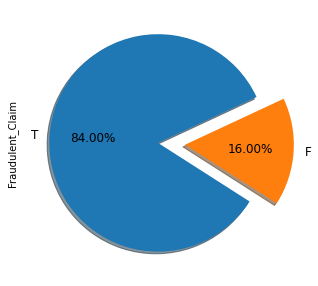

In [94]:
plt.figure(figsize=(5,5))
data.Fraudulent_Claim.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

Observation:
- So we have 84% data identified as farud claims and only 16% as non-fraud claims data
- This is an imbalanced data, we need to take care of this in furthet steps and make it more balanced

- Let's check how age can influence the Fraudulent_Claim:

In [106]:
data.groupby('Fraudulent_Claim').agg({'Age':['min','max','mean']})

Age                  
                   min    max       mean
Fraudulent_Claim                        
F                 21.0  100.0  68.125000
T                 17.0  100.0  56.642857

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


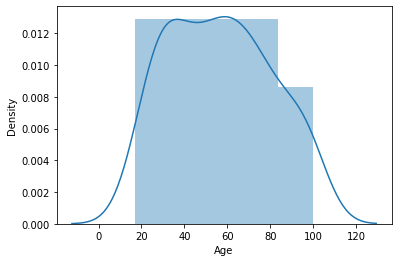

In [108]:
sns.distplot(data[data['Fraudulent_Claim']=='T']['Age']);

Observation:
- It seems all age group people can be involved with fraudalent activities. Though the distribution shows slight 2 peaks around age 35-40 and 60-65. So insurer may want to pay additional attention when the claims are raised from this age ranges.

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


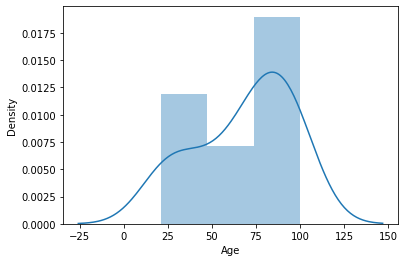

In [109]:
sns.distplot(data[data['Fraudulent_Claim']=='F']['Age']);

Observation:
- Most of the legit claims are from people with age>75. So we can say that old or elderly people may not be or less involved in fraudulent activities.

- Let's checl if Gender has any influence on fraud claims

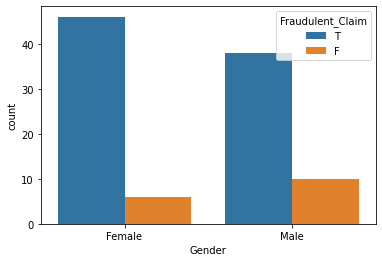

In [112]:
sns.countplot(x="Gender", hue='Fraudulent_Claim', data=data);

Observation:
- Most of the fraud claims are done by Female policy holders. Though there is not a huge difference with respect to gender.
- Let's perform a ch-square test to confirm this

In [123]:
pd.crosstab(data['Gender'], data['Fraudulent_Claim'], normalize='index')

Fraudulent_Claim,F,T
Gender,,
Female,0.115385,0.884615
Male,0.208333,0.791667


Obervations:
- This cross tabular form represents that given the Gender is 'Female' there is 88% chance of a raised claim being flagged a fraud.
- Similarly, given the Gender is 'Male' there is 79% chance of a raised claim being flagged a fraud.
- So, based on Gender there is not much difference wrt fraud claims
- Now to confirm this above statment let's perform a chi-squrae test

In [124]:
#Now do the chi2 test to establish the claim - Fare and Survival is related or not:
from scipy.stats import chi2_contingency as chi
obs_val = pd.crosstab(data['Gender'], data['Fraudulent_Claim'], normalize='index')
chi(obs_val)

#store the results into diff variables:
c,p,dof,exp_val = chi(obs_val)

#check the p-value of the test:
if p<0.05:
    print('Reject the Null hypothesis')
    print('There is a difference between Male & Female')
else:
    print('Do not reject the Null hypothesis')
    print('There is no difference between Male & Female')

Do not reject the Null hypothesis
There is no difference between Male & Female


Observation:
- There is not significant difference based on gender when it comes to fraud claims. Both men/women are likely to commit the crime.

- Let's look at the sum insured amount for fraud claims

In [125]:
data.groupby('Fraudulent_Claim').agg({'Sum_Insured':['min','max','mean']})

Sum_Insured                          
                         min         max          mean
Fraudulent_Claim                                      
F                  488974.44  9776294.99  5.689073e+06
T                  221004.85  9892380.34  4.349570e+06

Observation
- There is no significance differece in sum insured for fraud and legit claims

- Let's see how policy start date and end date can influence the type of the claim

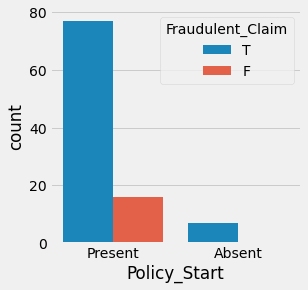

In [140]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['Policy_Start'], hue=data['Fraudulent_Claim']);
plt.show()

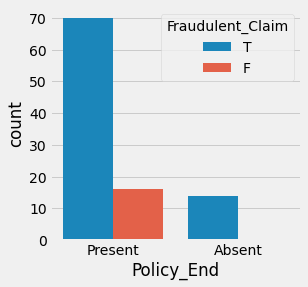

In [141]:
plt.figure(figsize=(4,4));
sns.countplot(x=data['Policy_End'], hue=data['Fraudulent_Claim']);
plt.show()

Observations:
- It seems that when there is policy start date or policy end date is missing those are only case of fraud claims.
- So a legit policy should have a valid policy start date and an end date as per the policy statement.
- If those dates are missing insurer may pay additional attention to find out why these are missing, is it just a data entry flaw or not.

- Let's look at the types of losses mentioned while raising a claim

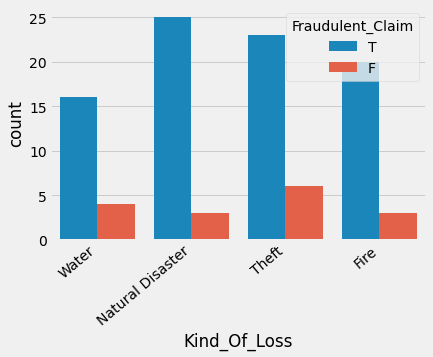

In [153]:
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='Kind_Of_Loss', hue='Fraudulent_Claim', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Observation
- Most of the claims are raised against loss from natural disaster and theft.
- But the proportion of fraud claims across all the kinds of loss look similar, there is not much difference.
- Now this data belongs to US Insurance company and it is covering almost 40 states data here. 
- States like Texas, California, Oklahoma are present which are prone to natural disaster from floods, tornadoes, winter storms, wildfires and hurricanes etc.

- Let's look at the top 10 states with highest number of fraud claims as per this data

In [204]:
data_test = data[data['Fraudulent_Claim']=='T']
state_wise_fraud_claims_Count = data_test.groupby('Policy_Holder_Area').agg({'Fraudulent_Claim':'count'}).sort_values('Fraudulent_Claim',ascending=False)

#Display the top states 
state_wise_fraud_claims_Count[:10]

,Fraudulent_Claim
Policy_Holder_Area,
Alabama,4
South Dakota,4
Louisiana,4
Illinois,4
Nevada,4
Rhode Island,3
Florida,3
Missouri,3
Maryland,3


Observation
- These are the top 10 states where most of the fraud claims have raised.

- Let's check Marital status vs fraud claims

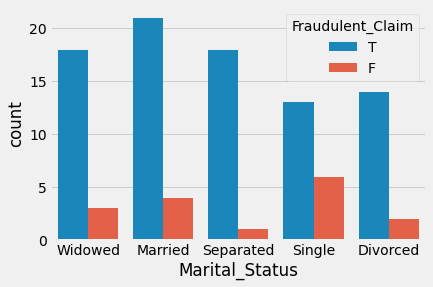

In [208]:
plt.figure(figsize=(6,4));
sns.countplot(x=data['Marital_Status'], hue=data['Fraudulent_Claim'])
plt.show();

Observation
- Single people are doing less fraud in comparsion to Married and separated people

- Now that we have explored the data feature wise let's move to the model building steps. 

#### Data pre-processing
- Cleaning up the data and prepare it for modelling

- Step1: Remove the unnecessary columns which adds no variatio/information to the data like different kind of IDs, Name, Postal code etc
- Step2: Convert the categorical data into numerical data
- Step3: Separate input(x) and output(y) for the model
- Step4: Split the data into train and test sets
- Step5: Then apply SMOTE on the train set to handle the class imbalance

In [238]:
df = data.copy()

In [239]:
# dropping unimportant columns
df.drop(['Name','Surname','Date_Of_Birth','Date_Of_Loss','Broker_ID','Insured_ID','Service_Provider','Policy_Holder_Street','Policy_Holder_Province','Policy_Holder_City','Policy_Holder_Postal'], axis=1, inplace=True)

In [240]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['Gender', 'Marital_Status', 'Policy_Start', 'Policy_End',
       'Fraudulent_Claim_Reason', 'Date_Of_Claim', 'Kind_Of_Loss',
       'Policy_Holder_Area', 'Fraudulent_Claim'],
      dtype='object')

In [241]:
#Apply encoding
x_features = list(df.columns)
x_features.remove('Fraudulent_Claim')
x_features

['Age',
 'Gender',
 'Marital_Status',
 'Sum_Insured',
 'Policies_Revenue',
 'Policy_Start',
 'Policy_End',
 'Fraudulent_Claim_Reason',
 'Date_Of_Claim',
 'Kind_Of_Loss',
 'Claim_Amount',
 'Policy_Holder_Area']

In [242]:
encoded_data = pd.get_dummies(df[x_features], drop_first=True)
encoded_data.head(2)

,Age,Sum_Insured,Policies_Revenue,Claim_Amount,Gender_Male,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,Policy_Start_Present,...,Policy_Holder_Area_Pennsylvania,Policy_Holder_Area_Rhode Island,Policy_Holder_Area_South Dakota,Policy_Holder_Area_Tennessee,Policy_Holder_Area_Texas,Policy_Holder_Area_Utah,Policy_Holder_Area_Vermont,Policy_Holder_Area_Virginia,Policy_Holder_Area_Washington,Policy_Holder_Area_Wyoming
0,48.0,757809.97,2472.35,212213.66,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50.0,6750638.09,1614.29,2488934.79,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


- apply SMOTE technique to upsample the minor class (non-fraud claims in this case)
- In this data Majority class is Fraud claims and Minority class is non-fraud claims
- But before applying this we need to split the data

In [243]:
df['Fraudulent_Claim'] = df['Fraudulent_Claim'].map(lambda x: 1 if x=='T' else 0)
df['Fraudulent_Claim'].value_counts()

1    84
0    16
Name: Fraudulent_Claim, dtype: int64

In [244]:
#Prepare x and y:
X = encoded_data
y = df['Fraudulent_Claim']

In [245]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [254]:
#Apply SMOTE technique to upsample the minory class records/samples
from imblearn.over_sampling import SMOTE 
#oversample the minority class to have 50% percent the number of the majority class.
sm = SMOTE(sampling_strategy=0.5)


#apply SMOTE on the train set
X_train_res, y_train_res = sm.fit_sample(x_train, y_train) 


#check the shape of the data now
print(X_train_res.shape, y_train_res.shape)


#check how the class labels look now
print(sum(y_train_res==1))
print(sum(y_train_res==0))

(100, 66) (100,)
67
33


Modelling
- As this is a binary classification problem so applied Logistics Regression at first
- With this dataset the availability of data is a constraint. As the dataset has less number of observations and higher number of features. So tried with different type of algorithm to compare which one works well with such data and can be reiable.


#### 1. Logistic Regression Model

In [255]:
#let's create an objcet of type Logistic Regression first
lr_model = LogisticRegression() 

#fit the train data
lr_model.fit(X_train_res, y_train_res) 

#make the predictions using the trained model
y_predictions = lr_model.predict(x_test) 
  
# print model report 
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.88      0.82      0.85        17

    accuracy                           0.75        20
   macro avg       0.56      0.58      0.57        20
weighted avg       0.78      0.75      0.76        20



Insights from the model report
- Here 1 is the 'Fraud claim' (or positive class) and 0 is the 'Non-fraud claim' (or negative class)
- The accuracy of the model is 75% 
- The recall of the majority class is 82%. It means that 82% of the actual Fraud claims are correctly predicted by the model. Which is not a bad recall score.
- The precision for the majority class is also good, 88%. It means that out of total predicted Fraud claims 88 of them are actually Fraud claims. Thus positive class prediction precision is also not bad.
- As for positive class (Fraud claim) both Recall and Precison are fine, hence the F1-score is also fine (85%).

#### 2. Decision Tree

In [264]:
#create an instance
dt_model = DecisionTreeClassifier()

#fit the train data to the model
dt_model.fit(X_train_res, y_train_res)

#predict using test set
y_predictions_dt = dt_model.predict(x_test)

#check the accuracy of the model
print(classification_report(y_test, y_predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        17

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Insigts:
- It seems that Decisison Tree model has overfitted the data

#### 3. KNN Model

In [266]:
x_scalar = StandardScaler()
x_scaled = x_scalar.fit_transform(X)

#create an instance
knn = KNeighborsClassifier()

#fit the train data to the model
knn.fit(X_train_res, y_train_res)

#predict using test set
y_predictions_knn = knn.predict(x_test)

#check the accuracy of the model
print(classification_report(y_test, y_predictions_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      0.82      0.82        17

    accuracy                           0.70        20
   macro avg       0.41      0.41      0.41        20
weighted avg       0.70      0.70      0.70        20



Insights
- KNN model is giving 70% accuracy on the balanced data

#### 4. Random Forest

In [259]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [270]:
rf_model = BaggingClassifier(base_estimator=RandomForestClassifier(),
                            bootstrap=True,
                            oob_score=True)

#fit the train data to the bagging model
rf_model.fit(X_train_res, y_train_res)

#predict using test set
y_predictions_rf = rf_model.predict(x_test)

#check the accuracy of the model
print(classification_report(y_test, y_predictions_rf))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



In [287]:
#Now check how the trained model has performed on the out of bag sample:
print(rf_model.score(X_train_res, y_train_res))   #score on train set
print(rf_model.oob_score_)                        #score on out of bag samples
print(rf_model.score(x_test,y_test))              #score on test set

1.0
0.99
0.9


Insights
- So, random forest model has not overfitted the data. It performs well on the OOB Sample as well.
- RF model is giving the highest accuracy among all the models applied here (90%)
- Recall for positive class is very high 1.00 (which is an ideal scenario), so still there is a suspecion on the model's performance.

- Calculate the Feature importance using Random forest model:

In [295]:
rf = RandomForestClassifier() 

# Fit the model on training data.
rf.fit(X_train_res, y_train_res) 

# And score it on your testing data.
rf.score(x_test, y_test)

import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_res.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head()

,importance
Fraudulent_Claim_Reason_No Reason Found,0.491614
Claim_Amount,0.090491
Sum_Insured,0.085729
Age,0.055284
Policies_Revenue,0.052555


#### ROC Check for the models:

In [275]:
# Area Under Curve
auc = roc_auc_score(y_test, y_predictions)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

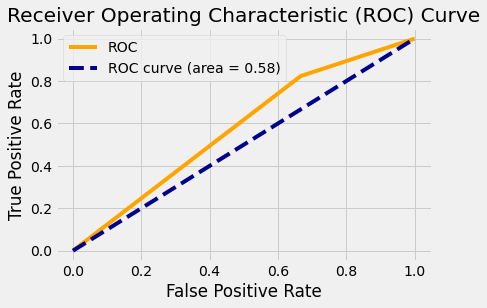

In [276]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [277]:
# Area Under Curve
auc = roc_auc_score(y_test, y_predictions_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions_rf)

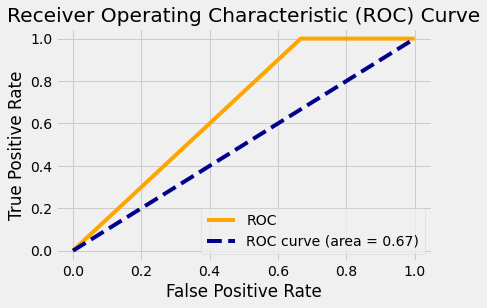

In [278]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Conclusion
### First Ask
- What we want to achieve here or what is the focus of the model here?
- Are we able to achieve the target?
- If yes, then through which model/models we are able to achieve it?

### Answer
- The aim of the project is to detect the fraud claims as much as possible because there is high cost associated with fraudulanet activities. Or we can say that there is a high cost associated with false negatives cases. 
- Organizations don't want to lose business over a fraud claims. So, in this prediction need to maximise the Recall for positive class i.e 'Fraud Claim'. It is not acceptable to predict a fruad claim as a non-fraud calim. But if the model predicts a non-fraud claim as a fraud claim then there is no loss from business point of view. 
- Among all the four models a simple algorithm like Logistic Regression has outperformed the rest.
- If we only consider the accuarcy then Random forest has preformed the best, but with Recall score as 100% it may not be good idea to rely on this model.
- Hence, as more generalized and reliable model Logistic Regression can be choosen for this particular dataset and the given problem statement.